In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
ip=pd.read_csv(r"C:\Users\POOJA SINGHAL\Desktop\Fingertips\Python\Projects\Project 3\Python_Linear_Regres (2).csv")
ip

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
ip['children']=ip['children'].fillna(0)
ip

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
ip.isnull().sum() #no null value

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

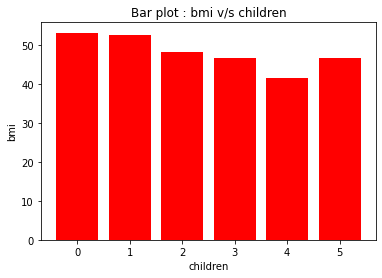

In [12]:
plt.title("Bar plot : bmi v/s children")
plt.xlabel("children")
plt.ylabel("bmi")
X=ip['children']
Y=ip['bmi']
plt.bar(X,Y, color='red')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
labelencoder = LabelEncoder()


In [17]:
ip[['sex','smoker','region']]=ip[['sex','smoker','region']].apply(labelencoder.fit_transform)
ip

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
from sklearn.preprocessing import StandardScaler
std_scal = StandardScaler()
ip_ss=pd.DataFrame(std_scal.fit_transform(ip),columns=ip.columns)
ip_ss.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


# PART 2 

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [32]:
X=ip.drop('charges',axis=1)
Y=ip['charges']

In [33]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [34]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=10)

In [36]:
X_train

,age,sex,bmi,children,smoker,region
428,21,0,16.815,1,0,0
226,28,1,38.060,0,0,2
867,57,1,43.700,1,0,3
397,21,1,31.020,0,0,2
300,36,1,27.550,3,0,0
...,...,...,...,...,...,...
1180,42,0,41.325,1,0,0
1147,20,0,31.920,0,0,1
527,51,0,25.800,1,0,3
1149,42,1,34.100,0,0,3


In [37]:
Y_train

428      3167.45585
226      2689.49540
867     11576.13000
397     16586.49771
300      6746.74250
           ...     
1180     7650.77375
1147     2261.56880
527      9861.02500
1149     5979.73100
1289     7147.47280
Name: charges, Length: 936, dtype: float64

In [38]:
X_test

,age,sex,bmi,children,smoker,region
7,37,0,27.740,3,0,1
999,36,0,26.885,0,0,1
1209,59,1,37.100,1,0,3
491,61,0,25.080,0,0,2
625,29,0,26.030,0,0,1
...,...,...,...,...,...,...
854,49,0,23.845,3,1,0
554,25,0,41.325,0,0,0
1278,39,1,29.925,1,1,0
374,20,1,33.330,0,0,2


In [39]:
Y_test

7        7281.50560
999      5267.81815
1209    12347.17200
491     24513.09126
625      3736.46470
           ...     
854     24106.91255
554     17878.90068
1278    22462.04375
374      1391.52870
6        8240.58960
Name: charges, Length: 402, dtype: float64

In [40]:
regression_model=LinearRegression()

In [41]:
regression_model.fit(X,Y)

LinearRegression()

In [43]:
regression_model.score(X_train,Y_train)

0.7607938645551561

In [44]:
regression_model.score(X_test,Y_test)

0.7225695574626496

In [48]:
char_predict=regression_model.predict(X)
char_predict

array([25111.24186363,  3687.60517284,  6963.14570669, ...,
        4363.66236622,  1106.98661296, 37013.72809551])

In [49]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
#rmse is done on target data and predicted data 

In [56]:
rmse=mean_squared_error(Y,char_predict)
r2 = r2_score(Y,char_predict) 
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('Root mean squared error: ', rmse) 
print('R2 score: ', r2) 
print('MSE:', mean_squared_error)
print('MAE:', mean_absolute_error)

Slope: [  257.28807486  -131.11057962   332.57013224   479.36939355
 23820.43412267  -353.64001656]
Intercept: -11815.452321231369
Root mean squared error:  36527659.88568238
R2 score:  0.7507372027994937
MSE: <function mean_squared_error at 0x09CE2BF8>
MAE: <function mean_absolute_error at 0x09CE2B20>
